# Projeto 2 - MC886

## Alunos: 
&emsp;&emsp;&emsp;&emsp;Felipe Escórcio de Sousa - RA:171043\
&emsp;&emsp;&emsp;&emsp;Miguel Augusto S Guida&nbsp;&nbsp;&nbsp;- RA:174847

## Objetivo
&emsp;Este projeto tem como objetivo aplicar métodos de aprendizado para resolver tarefas de regressão e classificação. O projeto será dividido em duas partes:
<li>
    <ul>Parte 1: Tarefa de Regressão</ul>
    <ul>Parte 2: Tarefa de Classificação</ul>
</li>

## Parte 1 - Tarefa de Regressão
&emsp;Considerando que somos um robô goleiro em uma partida de futebol de robôs, recebemos o início de duas trajetórias de chutes diferentes, e vamos analisar se somos capazes de prever a trajetória completa da bola e também se conseguimos defender o chute.\
&emsp;\
&emsp;Esta tarefa consiste em implementar uma regressão linear e uma regressão polinomial, e analisar quais modelos são melhores em prever a trajetória dos chutes.



## Implementação Regressão Linear
&emsp;Some text

### Imports
&emsp;Utilizaremos as bibliotecas numpy para os cálculos necessários, e também a biblioteca matplotlib para plotar os gráficos 3D e o gráfico da função de cust.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

### Importação dos datasets

In [9]:
def import_dataset(filename):
    with open(filename) as binary_file:
        data = []
        x = []
        y = []
        z = []
        for d in binary_file:
            string = d.split()
            x.append(float(string[0]))
            y.append(float(string[1]))
            z.append(float(string[2]))
            
    array = np.ndarray(shape=(len(x), 3), dtype=float)

    for i in range(len(x)):
        array[i][0] = x[i]
        array[i][1] = y[i]
        array[i][2] = z[i]

    return array

### Modelo  $h_W$
&emsp;Para calcular nosso modelo de regressão (linear e polinomial), utilizamos um cálculo vetorial entre a matriz de pesos $W$ (sem o elemento $W_0$) e a matriz de features $X$ transposta. Somamos o resultado desta operação com o peso $W_0$ para obter o resultado final.\
&emsp;Nossa fórmula é definida da seguinte forma: $ h_W = (W \times X^T) + W_0$

In [10]:
def calc_h(W, X):
    m = X.shape[0]
    h = np.dot(W[0,1:],X.T).reshape((m, 1))+W[0,0]
    return h

### Função de custo
&emsp;Utilizamos a função de custo MSE para calcular o custo das nossas predições.\
&emsp;A fórmula utilizada foi: $ \dfrac{1}{2*m}*\sum_{\substack{0 < i < m \\}}(h_W^i - y^i)^2 $

In [11]:
def cost(h, Y):
    m = Y.shape[0]
    j = (1/(2*m))*np.sum((h-Y)**2)
    return j

### Função Gradiente Descendente
&emsp;Implementamos a função gradiente descendente "from scratch". Ela realiza uma iteração completa pela base de dados (Batch Gradient Descent).\
&emsp;A função recebe como parâmetros:\
&emsp;&emsp;> **W**: Matriz linha com os pesos das features;\
&emsp;&emsp;> **X**: Matriz de features com *m* exemplos;\
&emsp;&emsp;> **Y**: Matriz de referência, com *m* exemplos;\
&emsp;&emsp;> **m**: Número de exemplos;\
&emsp;&emsp;> **n**: Número de features;\
&emsp;&emsp;> **learning_rate**: Taxa de aprendizagem;\
&emsp;&emsp;\
&emsp;Inicialmente, calculamos o valor de $h_W$ com oa parâmetros fornecidos, e utilizamos este dado para calcular a função de custo e atualizar os parâmetros.\
&emsp;Construímos o dicionário **grads** para guardar o gradiente de cada peso, e calculamos os gradientes através da fórmula: $$ \dfrac{1}{m}*\sum_{\substack{0 < i < m}}(h_W^i - y^i)*X^i $$
&emsp;Com os gradientes calculados, atualizamos os valores dos pesos com a fórmula:
$$ W_j = W_j - \alpha *dW_j $$


In [12]:
def gradient_desc(W,X,Y,m,n,learning_rate):
    h = calc_h(W,X)
    # print(h.shape)
    # print(h)
    j = cost(h, Y)
    print("cost: ",j)

    grads = {}
    grads["dw0"] = (1/m)*np.sum((h-Y))
    for i in range(1,n+1):
        grads["dw"+str(i)] = (1/m)*np.sum((h-Y)*X[:,i-1])
    # print(grads)
    for i in range(0,n+1):
        W[0,i] = W[0,i] - learning_rate*grads["dw"+str(i)]
    # print(W)
    return W,j


### Função de Regressão Linear
&emsp;Função que recebe os parâmetros iniciais e chama a porra toda kkkk

In [13]:
def regressaoLinear(X, Y, iterations, learning_rate, W_scale = 0.05):
    print(X.shape)
    n = X.shape[1]
    m = X.shape[0]

    W = np.random.rand(1,n+1)*W_scale 
    print("Init W: ", W)           
    
    costs = []
    for it in range(0,iterations):
        W, j = gradient_desc(W,X,Y,m,n,learning_rate)
        costs.append(j)
    
    plotGrafico(W,X,Y,costs,iterations)
    plotCosts(iterations, costs)

### Função para plotar gráfico 3D e Gráfico de Custo

In [14]:
def plotGrafico(W,X,Y,costs,iterations):
    h = calc_h(W, X)
    fig = plt.figure()

    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:,0], X[:,1], Y[:]) 
    ax.scatter(X[:,0], X[:,1], h)

    i = 2
    y = 1.109 - 0.050
    x = -1.192 - 0.050
    z = 1.11  - 0.01
    predX1 = []
    predX2 = []
    predH = []
    while y > 0:
        y = 1.109 - i*0.050
        x = -1.192 - i*0.050
        z = 1.11  - i*0.01
        h = calc_h(W,np.asarray([[x, y]]))
        predX1.append(x)
        predX2.append(y)
        predH.append(h)
        i+=1

    ax.scatter(predX1[:], predX2[:], predH[:]) 
    plt.show()

def plotCosts(iterations, costs):
    fig = plt.figure()
    plt.plot(range(0,iterations),costs[:])
    plt.show()

### Chamada da função linear

(20, 2)
Init W:  [[0.02298213 0.03339082 0.03652523]]
cost:  0.04615951058022777
cost:  0.021031718974248118
cost:  0.012245936472929472
cost:  0.009232670081338948
cost:  0.008238632497311996
cost:  0.00793889023440922
cost:  0.007870497603730901
cost:  0.007874593676430479
cost:  0.007898444947206582
cost:  0.00792566022589807
cost:  0.0079518647913996
cost:  0.00797638843492905
cost:  0.007999528545347443
cost:  0.008021713762253817
cost:  0.00804329068441172
cost:  0.008064499176620735
cost:  0.008085494513408344
cost:  0.008106373883609968
cost:  0.008127197015968172
cost:  0.008148000239164175


<IPython.core.display.Javascript object>


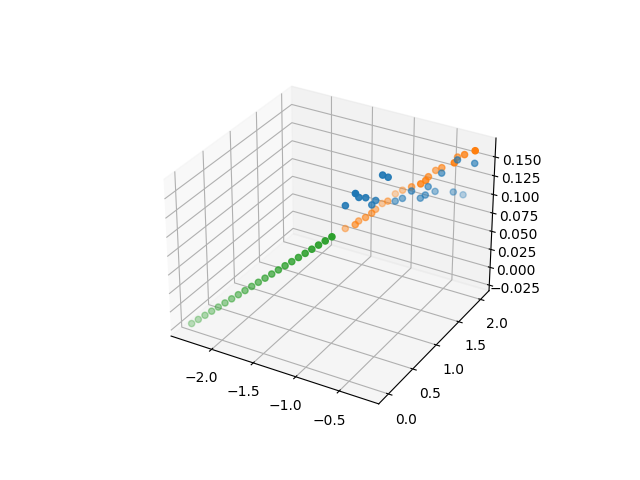

<IPython.core.display.Javascript object>


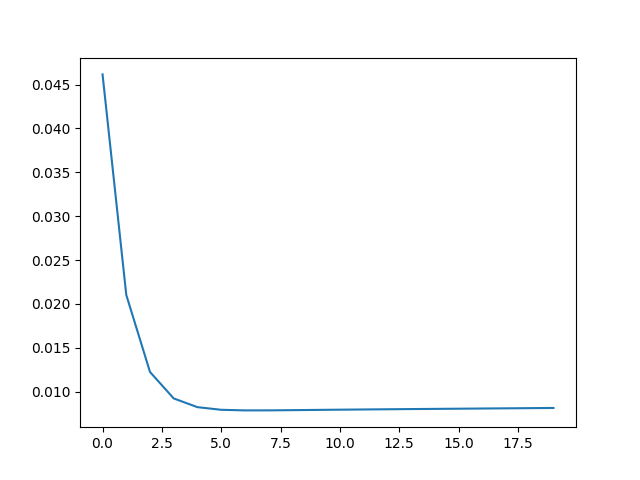

In [15]:
kick1 = import_dataset('kick1.dat')

learning_rate = 0.005
iterations = 20
W_scale = 0.05
regressaoLinear(kick1[:,:2], kick1[:,2], iterations, learning_rate, W_scale)

## Implementação Regressão Polinomial
&emsp;Usaremos as mesmas funções de h_theta, custo e gradiente utilizadas na regressão linear.\
&emsp;...

### Modelo Plotar Gráfico Polinomial

In [16]:
def plotRegression(W,X,Y,h,iterations,costs, X_original):
    fig = plt.figure()
    
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_original[:,0], X_original[:,1], Y[:]) 
    ax.scatter(X_original[:,0], X_original[:,1], h) 

    i = 2
    y = 1.109 - 0.050
    x = -0.596 - 0.030
    z = 0.11  - 0.01
    predX1 = []
    predX2 = []
    predH = []
    while y > 0:
        y = 1.109 - i*0.050
        x = -0.596 - i*0.030
        x2 = x**2
        y2 = y **2
        z = 0.269  - i*0.02
        h = calc_h(W,np.asarray([[x, y, y2]]))
        predX1.append(x)
        predX2.append(y)

        predH.append(h)
        i+=1

    ax.scatter(predX1[:], predX2[:], predH[:]) 
    plt.show()


### Função para Regressão Polinomial

In [17]:
def regressaoPolinomial(X_original, Y, iterations, learning_rate, W_scale=0.0009):
    print(X_original.shape)
    
    # X = np.array(X_original, copy=True)
    Y2 = X_original[:,1]**2
    X = np.hstack((X_original, Y2.reshape((X_original.shape[0],1))))
    
    n = X.shape[1]
    m = X.shape[0]
    W = np.random.rand(1,n+1)*W_scale 
    print("Init W: ", W)           
    
    costs = []

    for it in range(0,iterations):
        W, j = gradient_desc(W,X,Y,m,n,learning_rate)
        costs.append(j)
    
    h = calc_h(W, X)
    plotRegression(W,X,Y,h,iterations,costs, X_original)
    plotCosts(iterations, costs)

### Chamada da função de regressão polinomial

(20, 2)
Init W:  [[1.72514737e-05 2.05012970e-05 5.68836565e-06 1.29497847e-05]]
cost:  0.5863685380142392
cost:  0.29059917100545185
cost:  0.13779586785751757
cost:  0.09434829433714827
cost:  0.06503410746367144
cost:  0.058558759021122224
cost:  0.05161466430007118
cost:  0.04990249696810688
cost:  0.04736919424316464
cost:  0.04609843108982308
cost:  0.04455322973835022
cost:  0.04330972973159883
cost:  0.04204002626080671
cost:  0.04084147793748612
cost:  0.03968760634946835
cost:  0.03855874260907547
cost:  0.037484843234201135
cost:  0.036433529409295354
cost:  0.035432912078348075
cost:  0.03445998348735776
cost:  0.03353247474442258
cost:  0.03263708759493963
cost:  0.03178353515770256
cost:  0.03096483542296027
cost:  0.03018593429862016
cost:  0.029443364704469257
cost:  0.028739534579813115
cost:  0.028072783792218815
cost:  0.027444249543354567
cost:  0.02685315703009948
cost:  0.02630003163839874
cost:  0.025784518572570605
cost:  0.02530685655188777
cost:  0.02486688547

<IPython.core.display.Javascript object>


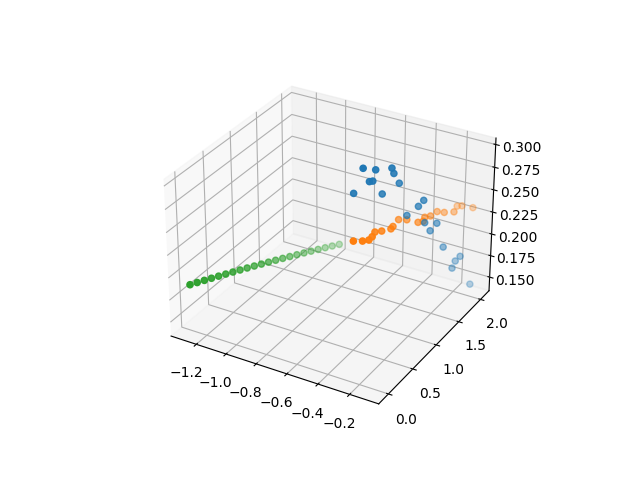

<IPython.core.display.Javascript object>


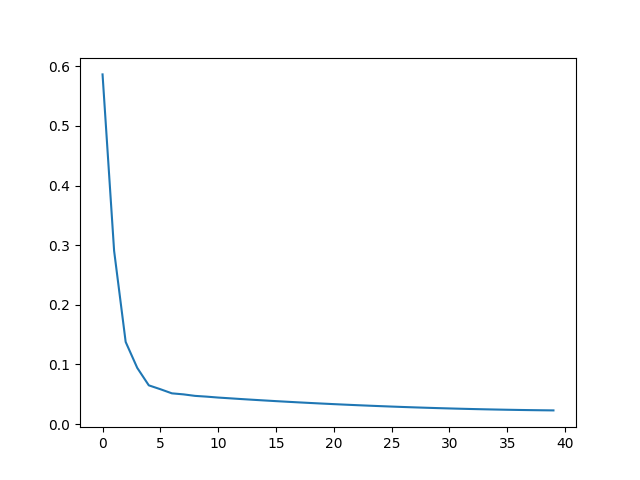

In [24]:
kick2 = import_dataset('kick2.dat')

learning_rate = 0.008
iterations = 40
W_scale=0.00003
regressaoPolinomial(kick2[:,:2], kick2[:,2], iterations, learning_rate, W_scale)

## Análises
&emsp;Define linear and polynomial regressions to learn your models, derive the equations, and implement a gradient
descent method from scratch\
&emsp;Train a linear and polynomial regression in each dataset\
&emsp;Evaluate the impact of the model complexity in the results (degree of the model)\
&emsp;Evaluate the impact of the learning rate (test at least 3 values) in the process\
&emsp;Plot the models learned to predict the trajectory (like Figure 2.1) along with the metrics used to evaluate them, discussing the results.